In [2]:
import numpy as np
from sparse_shift.datasets import sample_topological, sample_nonlinear_icp_sim
from sparse_shift.plotting import plot_dag
from sparse_shift.testing import test_mechanism_shifts, test_mechanism
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from causallearn.utils.cit import fisherz, kci

[autoreload of numba._version failed: Traceback (most recent call last):
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/importlib/__init__.py", line 159, in reload
    raise ImportError(msg.format(parent_name),
ImportError: parent 'numba' not in sys.modules
]
[autoreload of numba.misc failed: Traceback (most recent call last):
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    mo

[autoreload of numba.core.datamodel.models failed: Traceback (most recent call last):
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/numba/core/datamodel/models.py", line 1081, in <module>
    class SliceModel(StructModel):
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/pyt

[autoreload of numba.core.typeinfer failed: Traceback (most recent call last):
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/numba/core/typeinfer.py", line 26, in <module>
    from numba.core.errors import (TypingError, UntypedAttributeError,
ImportError: cannot import name 'Nu

[autoreload of numba.core.pylowering failed: Traceback (most recent call last):
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/numba/core/pylowering.py", line 14, in <module>
    from numba.core.errors import (ForbiddenConstruct, LoweringError,
ImportError: cannot import name 'N

TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
# X1 -> X2, X1->X3, X2->X3
true_parents = np.asarray([[0,  0, 0], [1, 0, 0], [1, 1 ,0]])
n = 100

g_noise = lambda: np.abs(np.random.standard_t(df=100))
g1_equations = [
    lambda X, U: U,
    lambda X, U: X[0] + U,
    lambda X, U: X[0] + X[1] + U,
]

g2_equations = [
    lambda X, U: U,
    lambda X, U: np.sqrt(2*np.pi*X[0]) + U,
    lambda X, U: X[0] + X[1] + U,
]

# 2 settings, X2|X1 changes
Xs = [
    sample_topological(n, g1_equations, g_noise, random_state=1),
    sample_topological(n, g2_equations, g_noise, random_state=2),
]

In [ ]:
df = pd.DataFrame(
    np.hstack((
        np.vstack(Xs),
        np.hstack([[i]*X.shape[0] for i, X in enumerate(Xs)]).reshape(-1, 1).astype(int)
    )),
    columns=[f'X{i+1}' for i in range(Xs[0].shape[1])] + ['y']
)
sns.pairplot(df, hue='y')
plt.show()

In [ ]:
m = 1
test_mechanism(Xs, m, true_parents[m], test='fisherz')
m = 1
test_mechanism(Xs, m, true_parents[m], test='kci')

## PC dicovery test

In [187]:
from causallearn.search.ConstraintBased.PC import pc

In [197]:
data = np.block([
    [X, np.reshape([i] * X.shape[0], (-1, 1))]
    for i, X in enumerate(Xs)
])
cg = pc(data, alpha=0.05 / 3, indep_test=kci)

  0%|          | 0/4 [00:00<?, ?it/s]

Green: undirected; Blue: directed; Red: bi-directed



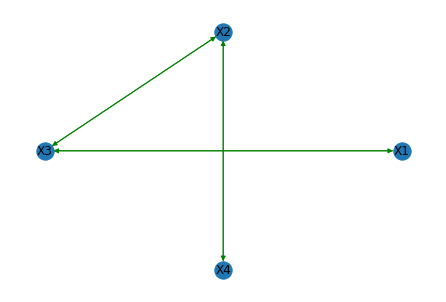

In [198]:
cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

In [231]:
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.graph.GraphNode import GraphNode
from causallearn.utils.PCUtils.BackgroundKnowledgeOrientUtils import \
    orient_by_background_knowledge

node1 = GraphNode('X1')
node2 = GraphNode('X2')
node3 = GraphNode('X3')
node4 = GraphNode('X4')

bk = BackgroundKnowledge() \
            .add_required_by_node(node4, node1) \
            .add_required_by_node(node4, node2) \
            .add_required_by_node(node4, node3)
#             .add_required_by_node(node1, node2) \
#             .add_required_by_node(node2, node3) \
#             .add_required_by_node(node1, node3) \
            

In [232]:
data = np.block([
    [X, np.reshape([i] * X.shape[0], (-1, 1))]
    for i, X in enumerate(Xs)
])
# data = Xs[1]
cg = pc(data, alpha=0.05 /3 , indep_test=kci)#, background_knowledge=bk)

  0%|          | 0/4 [00:00<?, ?it/s]

Green: undirected; Blue: directed; Red: bi-directed



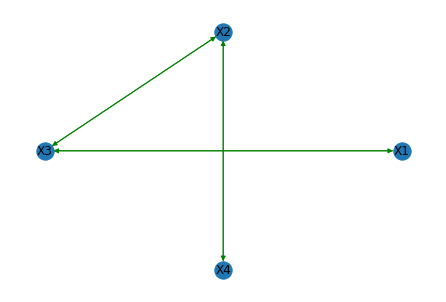

In [233]:
cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

In [234]:
orient_by_background_knowledge(cg, bk)

Green: undirected; Blue: directed; Red: bi-directed



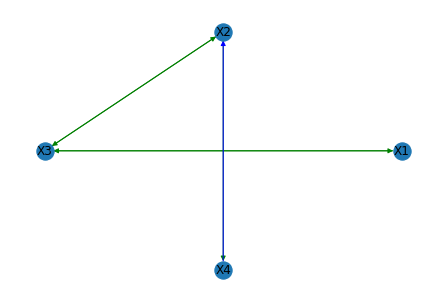

In [235]:
cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

## Test causaldag